In [1]:
! ipcluster start -n 5 --daemon

In [2]:
from ipyparallel import Client

rc = Client()

In [3]:
rc.ids

[0, 1, 2, 3]

In [4]:
rc[:].apply_sync(lambda : "Hello, World")

['Hello, World', 'Hello, World', 'Hello, World', 'Hello, World']

In [5]:
dview = rc[:] # use all engines

In [6]:
serial_result = map(lambda x:x**10, range(32))

In [7]:
parallel_result = dview.map_sync(lambda x: x**10, range(32))

In [8]:
print (list(serial_result))

[0, 1, 1024, 59049, 1048576, 9765625, 60466176, 282475249, 1073741824, 3486784401, 10000000000, 25937424601, 61917364224, 137858491849, 289254654976, 576650390625, 1099511627776, 2015993900449, 3570467226624, 6131066257801, 10240000000000, 16679880978201, 26559922791424, 41426511213649, 63403380965376, 95367431640625, 141167095653376, 205891132094649, 296196766695424, 420707233300201, 590490000000000, 819628286980801]


In [9]:
parallel_result

[0,
 1,
 1024,
 59049,
 1048576,
 9765625,
 60466176,
 282475249,
 1073741824,
 3486784401,
 10000000000,
 25937424601,
 61917364224,
 137858491849,
 289254654976,
 576650390625,
 1099511627776,
 2015993900449,
 3570467226624,
 6131066257801,
 10240000000000,
 16679880978201,
 26559922791424,
 41426511213649,
 63403380965376,
 95367431640625,
 141167095653376,
 205891132094649,
 296196766695424,
 420707233300201,
 590490000000000,
 819628286980801]

In [10]:
list(serial_result) == parallel_result

False

In [11]:
view = rc[:]

In [12]:
view.activate()

In [13]:
view.run('psum.py')

FileNotFoundError: [Errno 2] No such file or directory: 'psum.py'

In [14]:
import numpy as np
view.scatter('a', np.arange(16, dtype='float'))

<AsyncResult: scatter>

In [15]:
view['a']

[array([ 0.,  1.,  2.,  3.]),
 array([ 4.,  5.,  6.,  7.]),
 array([  8.,   9.,  10.,  11.]),
 array([ 12.,  13.,  14.,  15.])]

In [16]:
%px print ('hi')

<AsyncResult: execute>

In [17]:
%pxresult

[stdout:0] hi
[stdout:1] hi
[stdout:2] hi
[stdout:3] hi


In [18]:
with rc[:].sync_imports():
   ....:    import numpy

importing numpy on engine(s)


In [19]:
%px a = numpy.random.rand(2,2)

<AsyncResult: execute>

In [20]:
%px numpy.linalg.eigvals(a)

<AsyncResult: execute>

In [21]:
%pxresult

Out[0:3]: array([ 0.3289108 ,  1.60918595])

Out[1:3]: array([ 0.66540057, -0.35309045])

Out[2:3]: array([ 0.57865443,  1.25522434])

Out[3:3]: array([ 1.21804285,  0.63149025])

In [22]:
%px %pylab inline

<AsyncResult: execute>

In [23]:
%px plot(rand(100))

<AsyncResult: execute>

[output:0]

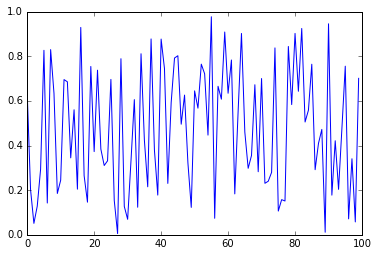

[output:1]

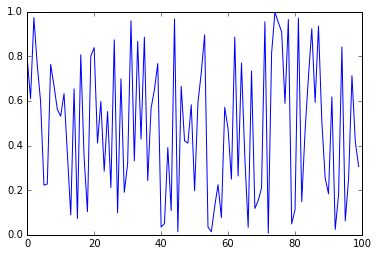

[output:2]

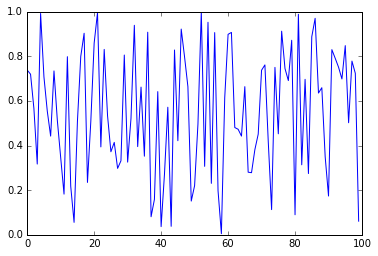

[output:3]

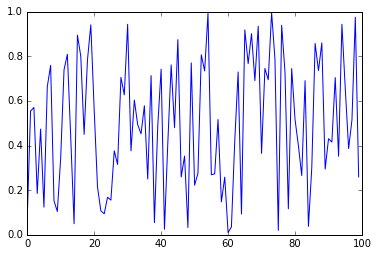

Out[0:5]: [<matplotlib.lines.Line2D at 0x7fa3e59dfa20>]

Out[1:5]: [<matplotlib.lines.Line2D at 0x7f3279cf09b0>]

Out[2:5]: [<matplotlib.lines.Line2D at 0x7f9020f4ba58>]

Out[3:5]: [<matplotlib.lines.Line2D at 0x7ff915a5a9e8>]

In [24]:
%pxresult

In [25]:
%%px --targets ::1
   ...: print ("I am even")

<AsyncResult: execute>

In [26]:
%pxresult

[stdout:0] I am even
[stdout:1] I am even
[stdout:2] I am even
[stdout:3] I am even


In [27]:
 %%px --targets 1
   ...: print ("I am number 1")
   ...:

<AsyncResult: execute>

In [28]:
%pxresult

I am number 1


In [29]:
%%px
   ...: print ("still 'all' by default")

<AsyncResult: execute>

In [30]:
%pxresult

[stdout:0] still 'all' by default
[stdout:1] still 'all' by default
[stdout:2] still 'all' by default
[stdout:3] still 'all' by default


In [31]:
view = rc[:]

In [32]:
view.run('hello.py')

FileNotFoundError: [Errno 2] No such file or directory: 'hello.py'

In [41]:
! ipcluster stop


2016-03-23 20:20:34.986 [IPClusterStop] Stopping cluster [pid=8296] with [signal=<Signals.SIGINT: 2>]
